In [6]:
import json
import pandas as pd

In [7]:
with open('../data/foundationFoods.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [8]:
unpacked_df = pd.json_normalize(df['Foods'])

In [9]:
unique_food_classes = unpacked_df['foodCategory'].unique().tolist()

print(unique_food_classes)

['Legumes and Legume Products', 'Vegetables and Vegetable Products', 'Sausages and Luncheon Meats', 'Nut and Seed Products', 'Dairy and Egg Products', 'Fruits and Fruit Juices', 'Baked Products', 'Spices and Herbs', 'Fats and Oils', 'Poultry Products', 'Soups, Sauces, and Gravies', 'Finfish and Shellfish Products', 'Restaurant Foods', 'Beef Products', 'Sweets', 'Pork Products', 'Cereal Grains and Pasta', 'Beverages', 'Lamb, Veal, and Game Products']


In [10]:
meats = ['Sausages and Luncheon Meats', 'Poultry Products', 'Finfish and Shellfish Products', 'Beef Products', 'Pork Products', 'Lamb, Veal, and Game Products']

unpacked_df["foodCategory"] = unpacked_df['foodCategory'].replace(meats, "Meats and Meat Products")

unique_food_classes = unpacked_df['foodCategory'].unique().tolist()

print(unique_food_classes)

['Legumes and Legume Products', 'Vegetables and Vegetable Products', 'Meats and Meat Products', 'Nut and Seed Products', 'Dairy and Egg Products', 'Fruits and Fruit Juices', 'Baked Products', 'Spices and Herbs', 'Fats and Oils', 'Soups, Sauces, and Gravies', 'Restaurant Foods', 'Sweets', 'Cereal Grains and Pasta', 'Beverages']


In [11]:
droppable_cats = ['Baked Products', 'Spices and Herbs', 'Fats and Oils', 'Soups, Sauces, and Gravies', 'Restaurant Foods', 'Sweets', 'Beverages']

#useful chatgpt oneliner
unpacked_df = unpacked_df[~unpacked_df['foodCategory'].isin(droppable_cats)]

unique_food_classes = unpacked_df['foodCategory'].unique().tolist()

print(unique_food_classes)

['Legumes and Legume Products', 'Vegetables and Vegetable Products', 'Meats and Meat Products', 'Nut and Seed Products', 'Dairy and Egg Products', 'Fruits and Fruit Juices', 'Cereal Grains and Pasta']


In [12]:
with open('../data/FoodData_Central_branded_food_json_2025-04-24.json','r', encoding="UTF-8") as f:
    data = json.load(f)

bf = pd.DataFrame(data)

In [13]:
unpacked_bf = pd.json_normalize(bf['BrandedFoods'])

In [14]:
print(unpacked_bf.columns)

Index(['foodClass', 'description', 'foodNutrients', 'foodAttributes',
       'modifiedDate', 'availableDate', 'marketCountry', 'brandOwner',
       'gtinUpc', 'dataSource', 'ingredients', 'servingSize',
       'servingSizeUnit', 'householdServingFullText', 'tradeChannels',
       'microbes', 'brandedFoodCategory', 'dataType', 'fdcId',
       'publicationDate', 'foodUpdateLog', 'labelNutrients.fat.value',
       'labelNutrients.saturatedFat.value', 'labelNutrients.transFat.value',
       'labelNutrients.cholesterol.value', 'labelNutrients.sodium.value',
       'labelNutrients.carbohydrates.value', 'labelNutrients.fiber.value',
       'labelNutrients.sugars.value', 'labelNutrients.protein.value',
       'labelNutrients.calcium.value', 'labelNutrients.iron.value',
       'labelNutrients.calories.value', 'labelNutrients.potassium.value',
       'labelNutrients.addedSugar.value', 'footnote', 'preparationStateCode',
       'brandName', 'packageWeight', 'subbrandName', 'discontinuedDate',
   

In [15]:
unique_food_classes = unpacked_bf['brandedFoodCategory'].unique().tolist()

print(unique_food_classes)

['Cereal', 'Rice', 'Ketchup, Mustard, BBQ & Cheese Sauce', 'Candy', 'Chewing Gum & Mints', 'Vegetable and Lentil Mixes', 'Crusts & Dough', 'Cake, Cookie & Cupcake Mixes', 'Frozen Pancakes, Waffles, French Toast & Crepes', 'Canned Fruit', 'Pasta by Shape & Type', 'Entrees, Sides & Small Meals', 'Seasoning Mixes, Salts, Marinades & Tenderizers', 'Pre-Packaged Fruit & Vegetables', 'Cakes, Cupcakes, Snack Cakes', 'Crackers & Biscotti', 'Breads & Buns', 'Frozen Bread & Dough', 'Tea Bags', 'Herbs & Spices', 'Water', 'Yogurt', 'Chips, Pretzels & Snacks', 'Soda', 'Salad Dressing & Mayonnaise', 'Cookies & Biscuits', 'Plant Based Milk', 'Jam, Jelly & Fruit Spreads', 'Popcorn, Peanuts, Seeds & Related Snacks', 'Ice Cream & Frozen Yogurt', 'Fish & Seafood', 'Butter & Spread', 'Canned Soup', 'Frozen Fish & Seafood', 'Canned Vegetables', "Frozen Appetizers & Hors D'oeuvres", 'Croissants, Sweet Rolls, Muffins & Other Pastries', 'Sausages, Hotdogs & Brats', 'Other Cooking Sauces', 'Chocolate', 'Pepper

In [16]:
cats = {
    'Canned & Bottled Beans',
    'Chickpeas',
    'Vegetables  Prepared/Processed',
    'Vegetables – Unprepared/Unprocessed (Shelf Stable)',
    'Frozen Vegetables',
    'Meat/Poultry/Other Animals  Unprepared/Unprocessed',
    'Meat/Poultry/Other Animals  Prepared/Processed',
    'Sausages, Hotdogs & Brats',
    'Frozen Poultry, Chicken & Turkey',
    'Nut & Seed Butters',
    'Popcorn, Peanuts, Seeds & Related Snacks',
    'Cheese',
    'Milk',
    'Yogurt',
    'Butter & Spread',
    'Cream',
    'Eggs & Egg Substitutes',
    'Canned Fruit',
    'Frozen Fruit & Fruit Juice Concentrates',
    'Fruit & Vegetable Juice, Nectars & Fruit Drinks',
    'Rice',
    'All Noodles',
    'Pasta by Shape & Type',
    'Pasta Dinners',
    'Cereal',
    'Cereal/Muesli Bars',
    'Bread'
}
bf_filtered = unpacked_bf[unpacked_bf['brandedFoodCategory'].isin(cats)].copy()

unique_food_classes = bf_filtered['brandedFoodCategory'].unique().tolist()

print(unique_food_classes)

['Cereal', 'Rice', 'Canned Fruit', 'Pasta by Shape & Type', 'Yogurt', 'Popcorn, Peanuts, Seeds & Related Snacks', 'Butter & Spread', 'Sausages, Hotdogs & Brats', 'Nut & Seed Butters', 'Milk', 'Cheese', 'Frozen Poultry, Chicken & Turkey', 'Fruit & Vegetable Juice, Nectars & Fruit Drinks', 'Frozen Fruit & Fruit Juice Concentrates', 'Cream', 'All Noodles', 'Pasta Dinners', 'Frozen Vegetables', 'Canned & Bottled Beans', 'Cereal/Muesli Bars', 'Eggs & Egg Substitutes', 'Vegetables  Prepared/Processed', 'Meat/Poultry/Other Animals  Unprepared/Unprocessed', 'Bread', 'Meat/Poultry/Other Animals  Prepared/Processed', 'Chickpeas']


brandedFoodCategory

In [17]:
category_map = {
    # Legumes
    'Canned & Bottled Beans': 'Legumes and Legume Products',
    'Chickpeas': 'Legumes and Legume Products',

    # Vegetables
    'Vegetables  Prepared/Processed': 'Vegetables and Vegetable Products',
    'Vegetables – Unprepared/Unprocessed (Shelf Stable)': 'Vegetables and Vegetable Products',
    'Frozen Vegetables': 'Vegetables and Vegetable Products',

    # Meats
    'Meat/Poultry/Other Animals  Unprepared/Unprocessed': 'Meats and Meat Products',
    'Meat/Poultry/Other Animals  Prepared/Processed': 'Meats and Meat Products',
    'Sausages, Hotdogs & Brats': 'Meats and Meat Products',
    'Frozen Poultry, Chicken & Turkey': 'Meats and Meat Products',

    # Dairy, Eggs
    'Cheese': 'Dairy and Egg Products',
    'Milk': 'Dairy and Egg Products',
    'Yogurt': 'Dairy and Egg Products',
    'Butter & Spread': 'Dairy and Egg Products',
    'Cream': 'Dairy and Egg Products',
    'Eggs & Egg Substitutes': 'Dairy and Egg Products',

    # Fruits
    'Canned Fruit': 'Fruits and Fruit Juices',
    'Frozen Fruit & Fruit Juice Concentrates': 'Fruits and Fruit Juices',
    'Fruit & Vegetable Juice, Nectars & Fruit Drinks': 'Fruits and Fruit Juices',

    # Grains, Cereal, Pasta
    'Rice': 'Cereal Grains and Pasta',
    'All Noodles': 'Cereal Grains and Pasta',
    'Pasta by Shape & Type': 'Cereal Grains and Pasta',
    'Pasta Dinners': 'Cereal Grains and Pasta',
    'Cereal': 'Cereal Grains and Pasta',
    'Cereal/Muesli Bars': 'Cereal Grains and Pasta',
    'Bread': 'Cereal Grains and Pasta',

    # Nuts and Seeds
    'Nut & Seed Butters': 'Nut and Seed Products',
    'Popcorn, Peanuts, Seeds & Related Snacks': 'Nut and Seed Products',
}

God bless ChatGPT for the above dictionary. 

In [18]:
bf_filtered['brandedFoodCategory'] = bf_filtered['brandedFoodCategory'].map(category_map)


bf_filtered['brandedFoodCategory'] = pd.Categorical(
    bf_filtered['brandedFoodCategory'],
    categories=[
        'Legumes and Legume Products', 'Vegetables and Vegetable Products', 'Meats and Meat Products', 'Dairy and Egg Products',
        'Fruits and Fruit Juices', 'Cereal Grains and Pasta', 'Nut and Seed Products'
    ],
    ordered=False
)

In [19]:
sample_bf = bf_filtered.sample(n=10)

print(sample_bf['brandedFoodCategory'])

51984     Meats and Meat Products
351178     Dairy and Egg Products
54165      Dairy and Egg Products
77625       Nut and Seed Products
315227    Cereal Grains and Pasta
260020     Dairy and Egg Products
29521     Fruits and Fruit Juices
5162        Nut and Seed Products
365489      Nut and Seed Products
327542      Nut and Seed Products
Name: brandedFoodCategory, dtype: category
Categories (7, object): ['Legumes and Legume Products', 'Vegetables and Vegetable Products', 'Meats and Meat Products', 'Dairy and Egg Products', 'Fruits and Fruit Juices', 'Cereal Grains and Pasta', 'Nut and Seed Products']


The above can be used to generate random samples of the categories of branded foods that map relatively nicely to our 7 categories. The future testing pipeline should be like: get the nutrients of the sample -> pass it to the classifier -> see what it classifies the nutrient list as -> compare it to the "branded_food_category" -> ??? -> Profit

In [20]:
#pd.DataFrame.from_dict(df['foodNutrients'])

In [21]:
uniqueFoundationalNutrients = []


for lst in unpacked_df['foodNutrients']:
    for dct in lst:
        print(str(dct.get('nutrient')) + " " +str(dct.get('amount')))
        if dct.get('nutrient') not in uniqueFoundationalNutrients:
            uniqueFoundationalNutrients.append(dct.get('nutrient'))
    print("\n")
    print("\n")

Cryptoxanthin, beta 3.0
Lycopene 0.0
Tocopherol, delta 1.3
Tocotrienol, gamma 0.0
Tocotrienol, delta 0.0
Vitamin C, total ascorbic acid 0.0
Thiamin 0.15
Riboflavin 0.115
Folate, total 36.0
Vitamin K (Dihydrophylloquinone) 0.0
Vitamin K (phylloquinone) 17.2
Fatty acids, total trans 0.018
Fatty acids, total saturated 2.22
SFA 8:0 0.0
SFA 12:0 0.0
SFA 14:0 0.009
PUFA 22:6 n-3 (DHA) 0.0
SFA 22:0 0.044
PUFA 20:5 n-3 (EPA) 0.0
PUFA 22:5 n-3 (DPA) 0.0
SFA 17:0 0.01
SFA 24:0 0.027
TFA 16:1 t 0.0
MUFA 24:1 c 0.005
MUFA 18:1 c 6.25
PUFA 18:2 n-6 c,c 6.81
MUFA 22:1 c 0.001
MUFA 17:1 0.007
Fatty acids, total trans-monoenoic 0.006
MUFA 15:1 0.0
PUFA 18:3 n-3 c,c,c (ALA) 0.637
PUFA 20:3 n-3 0.0
PUFA 22:4 0.0
Protein 7.35
Ash 1.97
Starch 8.12
Fructose 0.15
Lactose 0.0
Galactose 0.0
Fiber, total dietary 5.4
Iron, Fe 2.41
Magnesium, Mg 71.1
Phosphorus, P 166
Sodium, Na 438
Copper, Cu 0.348
Manganese, Mn 1.06
Vitamin A, RAE 1.0
Carotene, beta 12.0
Carotene, alpha 0.0
PUFA 20:4 0.005
PUFA 18:4 0.0
Fatty 

In [22]:
print(uniqueFoundationalNutrients)
print(len(uniqueFoundationalNutrients))

['Cryptoxanthin, beta', 'Lycopene', 'Tocopherol, delta', 'Tocotrienol, gamma', 'Tocotrienol, delta', 'Vitamin C, total ascorbic acid', 'Thiamin', 'Riboflavin', 'Folate, total', 'Vitamin K (Dihydrophylloquinone)', 'Vitamin K (phylloquinone)', 'Fatty acids, total trans', 'Fatty acids, total saturated', 'SFA 8:0', 'SFA 12:0', 'SFA 14:0', 'PUFA 22:6 n-3 (DHA)', 'SFA 22:0', 'PUFA 20:5 n-3 (EPA)', 'PUFA 22:5 n-3 (DPA)', 'SFA 17:0', 'SFA 24:0', 'TFA 16:1 t', 'MUFA 24:1 c', 'MUFA 18:1 c', 'PUFA 18:2 n-6 c,c', 'MUFA 22:1 c', 'MUFA 17:1', 'Fatty acids, total trans-monoenoic', 'MUFA 15:1', 'PUFA 18:3 n-3 c,c,c (ALA)', 'PUFA 20:3 n-3', 'PUFA 22:4', 'Protein', 'Ash', 'Starch', 'Fructose', 'Lactose', 'Galactose', 'Fiber, total dietary', 'Iron, Fe', 'Magnesium, Mg', 'Phosphorus, P', 'Sodium, Na', 'Copper, Cu', 'Manganese, Mn', 'Vitamin A, RAE', 'Carotene, beta', 'Carotene, alpha', 'PUFA 20:4', 'PUFA 18:4', 'Fatty acids, total monounsaturated', 'Fatty acids, total polyunsaturated', 'SFA 15:0', 'TFA 18

In [23]:
uniqueBrandedNutrients = []

for lst in bf_filtered['foodNutrients']:
    for dct in lst:
        nutrient = dct.get('nutrient').get('name')
        #print(str(nutrient) + " " +str(dict.get('amount')))
        if nutrient not in uniqueBrandedNutrients:
            uniqueBrandedNutrients.append(nutrient)
    #print("\n")
    #print("\n")

print(uniqueBrandedNutrients)
print(len(uniqueBrandedNutrients))

['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference', 'Energy', 'Total Sugars', 'Fiber, total dietary', 'Calcium, Ca', 'Iron, Fe', 'Sodium, Na', 'Vitamin A, IU', 'Vitamin C, total ascorbic acid', 'Cholesterol', 'Fatty acids, total trans', 'Fatty acids, total saturated', 'Potassium, K', 'Vitamin D (D2 + D3), International Units', 'Sugars, added', 'Fiber, soluble', 'Fiber, insoluble', 'Thiamin', 'Niacin', 'Fatty acids, total monounsaturated', 'Fatty acids, total polyunsaturated', 'Magnesium, Mg', 'Phosphorus, P', 'Zinc, Zn', 'Riboflavin', 'Vitamin B-6', 'Vitamin B-12', 'Folic acid', 'Copper, Cu', 'Pantothenic acid', 'Total sugar alcohols', 'Manganese, Mn', 'Folate, total', 'Carbohydrate, other', 'Vitamin K (phylloquinone)', 'Iodine, I', 'Glucose', 'Lactose', 'Caffeine', 'Molybdenum, Mo', 'Selenium, Se', 'Biotin', 'Choline, total', 'Vitamin E', 'Vitamin E (label entry primarily)', 'Ash', 'Water', 'Vitamin E (alpha-tocopherol)', 'Sugars, Total', 'SFA 12:0', 'Fructose', 'Sugars, i

In [24]:
commonNutrients = set(uniqueFoundationalNutrients) & set(uniqueBrandedNutrients)

print(commonNutrients)
print(len(commonNutrients))

{'Phenylalanine', 'Fatty acids, total saturated', 'Retinol', 'Iodine, I', 'Cystine', 'Biotin', 'Methionine', 'Niacin', 'Aspartic acid', 'Total lipid (fat)', 'SFA 12:0', 'Molybdenum, Mo', 'Magnesium, Mg', 'Fatty acids, total trans', 'Folate, total', 'Vitamin D (D2 + D3)', 'Vitamin A, RAE', 'Calcium, Ca', 'Cholesterol', 'Arginine', 'Sugars, Total', 'Pantothenic acid', 'Vitamin D3 (cholecalciferol)', 'Fructose', 'Choline, total', 'Threonine', 'Fatty acids, total polyunsaturated', 'Isoleucine', 'Histidine', 'Tryptophan', 'Fiber, insoluble', 'Lactose', 'Vitamin B-6', 'Copper, Cu', 'Tyrosine', 'Fiber, total dietary', 'Iron, Fe', 'PUFA 18:3 n-3 c,c,c (ALA)', 'Vitamin B-12', 'Carbohydrate, by difference', 'Fiber, soluble', 'Sodium, Na', 'Vitamin D (D2 + D3), International Units', 'Riboflavin', 'Vitamin C, total ascorbic acid', 'Phosphorus, P', 'Vitamin E (alpha-tocopherol)', 'Serine', 'Glucose', 'Zinc, Zn', 'Fatty acids, total monounsaturated', 'Protein', 'Cysteine', 'Ash', 'Glutamic acid', 'V

In [25]:
unique_units = set()
for food in unpacked_df['foodNutrients']:
    if isinstance(food, list):
        for nutrient in food:
            unit_name = nutrient.get('unit')
            if unit_name:
                unique_units.add(unit_name)
print("Unique nutrient unit names found in the dataset:")
print(unique_units)

Unique nutrient unit names found in the dataset:
{'g', 'IU', 'mg', 'ﾂｵg'}


In [26]:
def standardize_nutrient_units(food_nutrients_list):
    """
    Standardizes nutrient amounts to grams (G) within a list of nutrient dictionaries.
    Amounts are assumed to be per 100g of food already.
    """
    if not isinstance(food_nutrients_list, list):
        return None 
        
    standardized_nutrients = []
    for nutrient in food_nutrients_list:
        nutrient_copy = copy.deepcopy(nutrient)
        original_amount = nutrient_copy.get('amount')
        unit_name = str(nutrient_copy.get('unit', '')).upper()

        if original_amount is None:
            standardized_nutrients.append(nutrient_copy)
            continue

        new_amount = original_amount
        if unit_name == 'MG':
            new_amount = original_amount / 1000.0
            nutrient_copy['unit'] = 'g'
        elif unit_name in ['UG', 'ΜG', 'MCG', '\u00b5g']: # Handling 'µg' (often as UG or MCG)
            new_amount = original_amount / 1_000_000.0
            nutrient_copy['unit'] = 'g'
        elif unit_name == 'G':
            pass
        else:
            pass 

        nutrient_copy['amount'] = new_amount 
        standardized_nutrients.append(nutrient_copy)
        
    return standardized_nutrients

In [27]:
print(unpacked_df['foodNutrients'][0])

[{'nutrient': 'Cryptoxanthin, beta', 'unit': 'ﾂｵg', 'amount': 3.0}, {'nutrient': 'Lycopene', 'unit': 'ﾂｵg', 'amount': 0.0}, {'nutrient': 'Tocopherol, delta', 'unit': 'mg', 'amount': 1.3}, {'nutrient': 'Tocotrienol, gamma', 'unit': 'mg', 'amount': 0.0}, {'nutrient': 'Tocotrienol, delta', 'unit': 'mg', 'amount': 0.0}, {'nutrient': 'Vitamin C, total ascorbic acid', 'unit': 'mg', 'amount': 0.0}, {'nutrient': 'Thiamin', 'unit': 'mg', 'amount': 0.15}, {'nutrient': 'Riboflavin', 'unit': 'mg', 'amount': 0.115}, {'nutrient': 'Folate, total', 'unit': 'ﾂｵg', 'amount': 36.0}, {'nutrient': 'Vitamin K (Dihydrophylloquinone)', 'unit': 'ﾂｵg', 'amount': 0.0}, {'nutrient': 'Vitamin K (phylloquinone)', 'unit': 'ﾂｵg', 'amount': 17.2}, {'nutrient': 'Fatty acids, total trans', 'unit': 'g', 'amount': 0.018}, {'nutrient': 'Fatty acids, total saturated', 'unit': 'g', 'amount': 2.22}, {'nutrient': 'SFA 8:0', 'unit': 'g', 'amount': 0.0}, {'nutrient': 'SFA 12:0', 'unit': 'g', 'amount': 0.0}, {'nutrient': 'SFA 14:

In [30]:
import json
import os
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [31]:
if 'foodNutrients' in unpacked_df.columns and not unpacked_df.empty:
    unpacked_df['foodNutrients_standardized'] = unpacked_df['foodNutrients'].apply(standardize_nutrient_units)
    
    print("Applied nutrient unit standardization. New column 'foodNutrients_standardized' created.")
    
    print("\n--- Sample of original foodNutrients (first food item, first 2 nutrients if available) ---")
    original_nutrients_sample = unpacked_df.iloc[0]['foodNutrients']
    if original_nutrients_sample and isinstance(original_nutrients_sample, list) and len(original_nutrients_sample) > 0:
        for i, nutrient in enumerate(original_nutrients_sample[:2]):
            print(f"Nutrient {i+1}: Name='{nutrient.get('nutrient')}', Amount={nutrient.get('amount')}, Unit='{nutrient.get('unit')}'")
    else:
        print("No original nutrient data to display for the first food item or it's not in the expected list format.")

    print("\n--- Sample of standardized foodNutrients_standardized (first food item, first 2 nutrients if available) ---")
    standardized_nutrients_sample = unpacked_df.iloc[0]['foodNutrients_standardized']
    if standardized_nutrients_sample and isinstance(standardized_nutrients_sample, list) and len(standardized_nutrients_sample) > 0:
        for i, nutrient in enumerate(standardized_nutrients_sample[:2]):
            print(f"Nutrient {i+1}: Name='{nutrient.get('nutrient')}', Amount={nutrient.get('amount')}, Unit='{nutrient.get('unit')}'")
    else:
        print("No standardized nutrient data to display for the first food item or it's not in the expected list format.")
else:
    print("Error: 'foodNutrients' column not found in DataFrame or DataFrame is empty. Cannot standardize.")

Applied nutrient unit standardization. New column 'foodNutrients_standardized' created.

--- Sample of original foodNutrients (first food item, first 2 nutrients if available) ---
Nutrient 1: Name='Cryptoxanthin, beta', Amount=3.0, Unit='ﾂｵg'
Nutrient 2: Name='Lycopene', Amount=0.0, Unit='ﾂｵg'

--- Sample of standardized foodNutrients_standardized (first food item, first 2 nutrients if available) ---
Nutrient 1: Name='Cryptoxanthin, beta', Amount=3.0, Unit='ﾂｵg'
Nutrient 2: Name='Lycopene', Amount=0.0, Unit='ﾂｵg'


In [32]:
valid_nutrients = {
    'Protein',
    'Fiber, total dietary',
    'Fiber, soluble',
    'Fiber, insoluble',
    'Calcium, Ca',
    'Fatty acids, total monounsaturated',
    'Fatty acids, total polyunsaturated',
    'Vitamin C, total ascorbic acid',
    'Fatty acids, total saturated',
    'Sodium, Na',
    'Total Sugars',
    'Sugars, Total',
    'Carbohydrate, by difference',
    'Magnesium, Mg',
    'Vitamin D (D2 + D3)',
    'Vitamin D3 (cholecalciferol)',
    'Potassium, K',
    'Glucose',
    'Riboflavin',
    'Vitamin B-6',
    'Biotin',
    'Fructose',
    'Cholesterol',
}

# Define filtering function
def filter_nutrients(nutrient_list):
    return [entry for entry in nutrient_list if entry.get('nutrient') in valid_nutrients]

# Apply to DataFrame column
unpacked_df['foodNutrients_standardized'] = unpacked_df['foodNutrients_standardized'].apply(filter_nutrients)

In [33]:
#Create a list of dictionaries, where each dictionary maps nutrient names to amounts for a single food
all_foods_nutrient_data_for_df = []

for index, row in unpacked_df.iterrows():
    nutrients_for_this_food = {}
  
    if isinstance(row['foodNutrients_standardized'], list):
        for nutrient_info in row['foodNutrients_standardized']:
            # Check if nutrient_info is a dictionary and has the required keys
            if isinstance(nutrient_info, dict) and 'nutrient' in nutrient_info and 'amount' in nutrient_info:
                nutrient_name = str(nutrient_info['nutrient']).strip() # Use cleaned nutrient name as key
                amount = nutrient_info['amount']

                nutrients_for_this_food[nutrient_name] = amount

    all_foods_nutrient_data_for_df.append(nutrients_for_this_food)

# Create a DataFrame from this list of dictionaries

nutrient_features_df = pd.DataFrame(all_foods_nutrient_data_for_df, index=unpacked_df.index)

# Sort columns alphabetically
nutrient_features_df = nutrient_features_df.reindex(sorted(nutrient_features_df.columns), axis=1)

#Fill NaN values with 0
nutrient_features_df = nutrient_features_df.fillna(0)

# Defines our feature matrix X and target vector y
X = nutrient_features_df
y = unpacked_df['foodCategory']

# Displays some information about the created feature matrix and target vector
print("--- Nutrient Features DataFrame (X) ---")
print(f"Shape of X (features): {X.shape}")
print(X.head())

print("\n--- Target Vector (y) ---")
print(f"Shape of y (target classes): {y.shape}")
print(y.head())
print("\nValue counts for y (target classes):")
print(y.value_counts().head()) # Show top few classes

# Verifys no NaN values are left in X
print(f"\nTotal NaN values in X after fillna(0): {X.isnull().sum().sum()}")

# Checks consistency of number of samples
if X.shape[0] == y.shape[0]:
    print(f"\nNumber of samples in X ({X.shape[0]}) matches y ({y.shape[0]}). Ready for train-test split.")
else:
    print(f"\nWarning: Mismatch in number of samples! X has {X.shape[0]}, y has {y.shape[0]}.")

--- Nutrient Features DataFrame (X) ---
Shape of X (features): (316, 23)
   Biotin  Calcium, Ca  Carbohydrate, by difference  Cholesterol  \
0     0.0        0.041                        14.90          0.0   
1     0.0        0.011                         5.51          0.0   
2     0.0        0.036                         4.11          0.0   
3     0.0        0.015                         2.89          0.0   
4     0.0        0.273                        16.20          0.0   

   Fatty acids, total monounsaturated  Fatty acids, total polyunsaturated  \
0                                6.37                               7.480   
1                                0.00                               0.000   
2                                0.00                               0.000   
3                               12.10                               0.954   
4                               34.20                              14.500   

   Fatty acids, total saturated  Fiber, insoluble  Fibe

In [34]:
# Check if X and y are defined and not empty
if 'X' in locals() and hasattr(X, 'empty') and not X.empty and \
   'y' in locals() and hasattr(y, 'empty') and not y.empty:
    
    print("--- Splitting Data into Training and Testing Sets ---")
    # Split the data into training (80%) and testing (20%) sets

    # random_state ensures reproducibility of the split
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.20, 
        random_state=42, 
        stratify=y
    )

    print("\n--- Data Split Complete ---")
    print(f"Shape of X_train (training features): {X_train.shape}")
    print(f"Shape of X_test (testing features):  {X_test.shape}")
    print(f"Shape of y_train (training labels): {y_train.shape}")
    print(f"Shape of y_test (testing labels):  {y_test.shape}")

    print("\n--- Training Set Class Distribution (y_train) ---")
    print(y_train.value_counts(normalize=True).head()) # Percentage distribution for top classes

    print("\n--- Testing Set Class Distribution (y_test) ---")
    print(y_test.value_counts(normalize=True).head()) # Percentage distribution for top classes
    
else:
    print("Error: X or y is not defined or is empty. Please ensure the Feature Preparation cell was run successfully and X, y variables are available.")

--- Splitting Data into Training and Testing Sets ---

--- Data Split Complete ---
Shape of X_train (training features): (252, 23)
Shape of X_test (testing features):  (64, 23)
Shape of y_train (training labels): (252,)
Shape of y_test (testing labels):  (64,)

--- Training Set Class Distribution (y_train) ---
foodCategory
Vegetables and Vegetable Products    0.246032
Meats and Meat Products              0.162698
Fruits and Fruit Juices              0.150794
Dairy and Egg Products               0.130952
Cereal Grains and Pasta              0.130952
Name: proportion, dtype: float64

--- Testing Set Class Distribution (y_test) ---
foodCategory
Vegetables and Vegetable Products    0.250000
Meats and Meat Products              0.156250
Fruits and Fruit Juices              0.156250
Dairy and Egg Products               0.140625
Cereal Grains and Pasta              0.125000
Name: proportion, dtype: float64


--- Training the RandomForestClassifier ---
Model training complete.

--- Evaluating Model Performance on the Test Set ---
Accuracy: 0.8438

Classification Report:
                                   precision    recall  f1-score   support

          Cereal Grains and Pasta       1.00      1.00      1.00         8
           Dairy and Egg Products       1.00      0.78      0.88         9
          Fruits and Fruit Juices       0.80      0.80      0.80        10
      Legumes and Legume Products       0.71      0.71      0.71         7
          Meats and Meat Products       0.83      1.00      0.91        10
            Nut and Seed Products       0.60      0.75      0.67         4
Vegetables and Vegetable Products       0.87      0.81      0.84        16

                         accuracy                           0.84        64
                        macro avg       0.83      0.84      0.83        64
                     weighted avg       0.85      0.84      0.84        64


Confusi

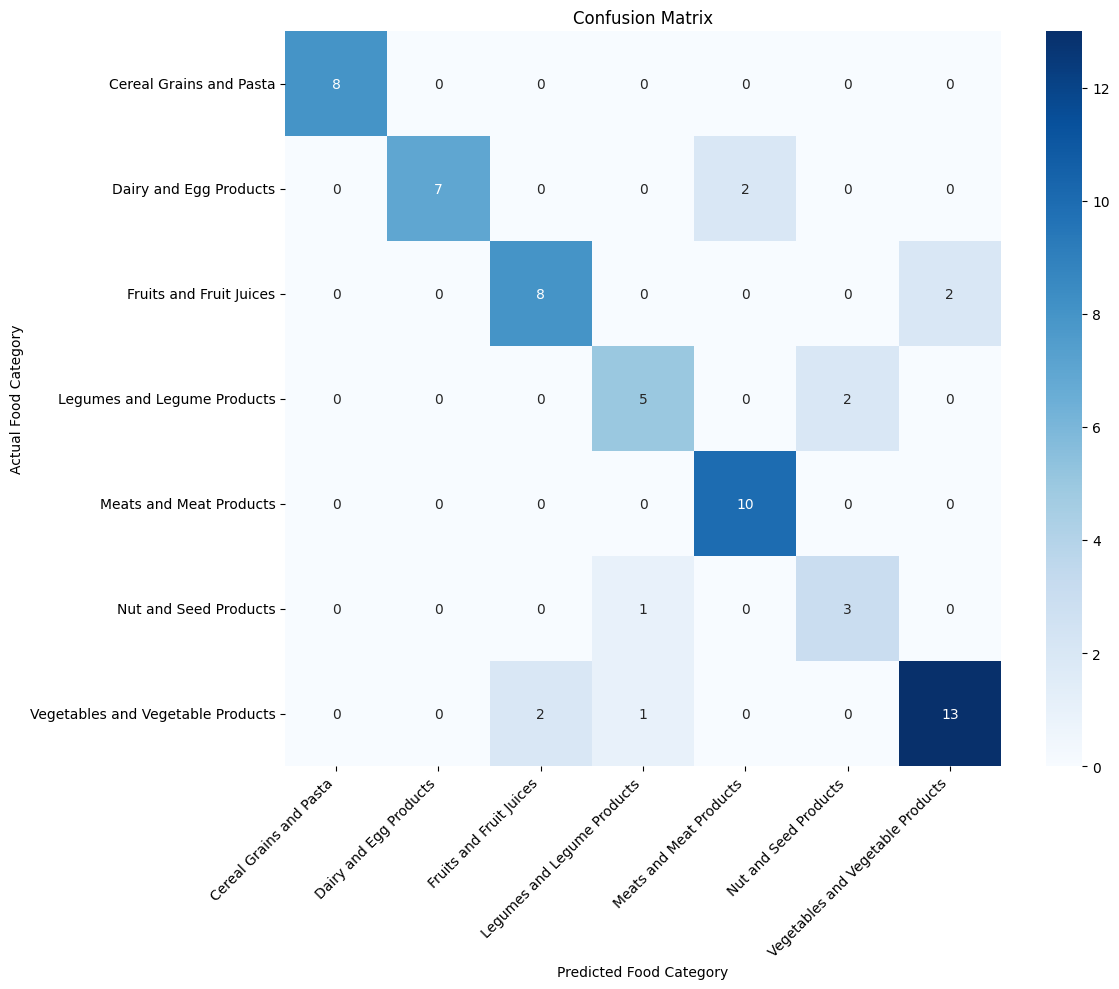

In [35]:
# Checks if training data is available
if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:
    print("--- Training the RandomForestClassifier ---")
    
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    
    # Train the model
    model.fit(X_train, y_train)
    
    print("Model training complete.")
    
    # Evaluating the Model
    print("\n--- Evaluating Model Performance on the Test Set ---")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Generate a classification report
    print("\nClassification Report:")
    # Get all unique labels that are present in either y_test or y_pred for the report

    report_labels = np.union1d(y_test.unique(), y_pred) 
    print(classification_report(y_test, y_pred, labels=report_labels, zero_division=0))
    
    # Generates and display the confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=report_labels)
    
    # Plotting the confusion matrix for better visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=report_labels, yticklabels=report_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Food Category')
    plt.xlabel('Predicted Food Category')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Error: Training data (X_train, y_train) not found. Please ensure the train-test split cell was run successfully.")

In [36]:
def simplify_nutrients(nutrient_list):
    return [
        {
            'nutrient': item['nutrient']['name'],
            'unit': item['nutrient']['unitName'],
            'amount': item['amount']
        }
        for item in nutrient_list
    ]

bf_filtered['simplifiedNutrients'] = bf_filtered['foodNutrients'].apply(simplify_nutrients)

In [37]:
print(bf_filtered['simplifiedNutrients'][0])

[{'nutrient': 'Protein', 'unit': 'g', 'amount': 10.7}, {'nutrient': 'Total lipid (fat)', 'unit': 'g', 'amount': 25.0}, {'nutrient': 'Carbohydrate, by difference', 'unit': 'g', 'amount': 57.1}, {'nutrient': 'Energy', 'unit': 'kcal', 'amount': 500}, {'nutrient': 'Total Sugars', 'unit': 'g', 'amount': 21.4}, {'nutrient': 'Fiber, total dietary', 'unit': 'g', 'amount': 7.1}, {'nutrient': 'Calcium, Ca', 'unit': 'mg', 'amount': 71.0}, {'nutrient': 'Iron, Fe', 'unit': 'mg', 'amount': 3.86}, {'nutrient': 'Sodium, Na', 'unit': 'mg', 'amount': 161}, {'nutrient': 'Vitamin A, IU', 'unit': 'IU', 'amount': 0.0}, {'nutrient': 'Vitamin C, total ascorbic acid', 'unit': 'mg', 'amount': 0.0}, {'nutrient': 'Cholesterol', 'unit': 'mg', 'amount': 0.0}, {'nutrient': 'Fatty acids, total trans', 'unit': 'g', 'amount': 0.0}, {'nutrient': 'Fatty acids, total saturated', 'unit': 'g', 'amount': 7.14}]


In [38]:
if 'foodNutrients' in bf_filtered.columns and not bf_filtered.empty:
    bf_filtered['foodNutrients_standardized'] = bf_filtered['simplifiedNutrients'].apply(standardize_nutrient_units)
    
    print("Applied nutrient unit standardization. New column 'foodNutrients_standardized' created.")
    
    print("\n--- Sample of original foodNutrients (first food item, first 2 nutrients if available) ---")
    original_nutrients_sample = bf_filtered.iloc[0]['simplifiedNutrients']
    if original_nutrients_sample and isinstance(original_nutrients_sample, list) and len(original_nutrients_sample) > 0:
        for i, nutrient in enumerate(original_nutrients_sample[:2]):
            print(f"Nutrient {i+1}: Name='{nutrient.get('nutrient')}', Amount={nutrient.get('amount')}, Unit='{nutrient.get('unit')}'")
    else:
        print("No original nutrient data to display for the first food item or it's not in the expected list format.")

    print("\n--- Sample of standardized foodNutrients_standardized (first food item, first 2 nutrients if available) ---")
    standardized_nutrients_sample = bf_filtered.iloc[0]['foodNutrients_standardized']
    if standardized_nutrients_sample and isinstance(standardized_nutrients_sample, list) and len(standardized_nutrients_sample) > 0:
        for i, nutrient in enumerate(standardized_nutrients_sample[:2]):
            print(f"Nutrient {i+1}: Name='{nutrient.get('nutrient')}', Amount={nutrient.get('amount')}, Unit='{nutrient.get('unit')}'")
    else:
        print("No standardized nutrient data to display for the first food item or it's not in the expected list format.")
else:
    print("Error: 'foodNutrients' column not found in DataFrame or DataFrame is empty. Cannot standardize.")

Applied nutrient unit standardization. New column 'foodNutrients_standardized' created.

--- Sample of original foodNutrients (first food item, first 2 nutrients if available) ---
Nutrient 1: Name='Protein', Amount=10.7, Unit='g'
Nutrient 2: Name='Total lipid (fat)', Amount=25.0, Unit='g'

--- Sample of standardized foodNutrients_standardized (first food item, first 2 nutrients if available) ---
Nutrient 1: Name='Protein', Amount=10.7, Unit='g'
Nutrient 2: Name='Total lipid (fat)', Amount=25.0, Unit='g'


In [39]:
bf_filtered['foodNutrients_standardized'] = bf_filtered['foodNutrients_standardized'].apply(filter_nutrients)

In [40]:
#Create a list of dictionaries, where each dictionary maps nutrient names to amounts for a single food
all_foods_nutrient_data_for_bf = []

for index, row in bf_filtered.iterrows():
    nutrients_for_this_food = {}
  
    if isinstance(row['foodNutrients_standardized'], list):
        for nutrient_info in row['foodNutrients_standardized']:
            # Check if nutrient_info is a dictionary and has the required keys
            if isinstance(nutrient_info, dict) and 'nutrient' in nutrient_info and 'amount' in nutrient_info:
                nutrient_name = str(nutrient_info['nutrient']).strip() # Use cleaned nutrient name as key
                amount = nutrient_info['amount']

                nutrients_for_this_food[nutrient_name] = amount

    all_foods_nutrient_data_for_bf.append(nutrients_for_this_food)

# Create a DataFrame from this list of dictionaries

nutrient_features_bf = pd.DataFrame(all_foods_nutrient_data_for_bf, index=bf_filtered.index)

# Sort columns alphabetically
nutrient_features_bf = nutrient_features_bf.reindex(sorted(nutrient_features_bf.columns), axis=1)

#Fill NaN values with 0
nutrient_features_bf = nutrient_features_bf.fillna(0)

In [41]:
print(nutrient_features_bf)

        Biotin  Calcium, Ca  Carbohydrate, by difference  Cholesterol  \
0          0.0        0.071                         57.1        0.000   
1          0.0        0.000                         80.0        0.000   
11         0.0        0.009                         15.7        0.000   
12         0.0        0.000                         69.6        0.000   
17         0.0        0.036                         75.0        0.000   
...        ...          ...                          ...          ...   
452288     0.0        0.029                         46.4        0.000   
452466     0.0        0.000                         51.5        0.007   
452467     0.0        0.000                         51.5        0.007   
452468     0.0        0.016                         43.1        0.000   
452475     0.0        0.000                         50.0        0.007   

        Fatty acids, total monounsaturated  \
0                                      0.0   
1                              

In [42]:
X_bf = nutrient_features_bf
y_bf = bf_filtered['brandedFoodCategory']

In [43]:
print(y_bf)

0         Cereal Grains and Pasta
1         Cereal Grains and Pasta
11        Fruits and Fruit Juices
12        Cereal Grains and Pasta
17        Cereal Grains and Pasta
                   ...           
452288    Cereal Grains and Pasta
452466    Cereal Grains and Pasta
452467    Cereal Grains and Pasta
452468    Cereal Grains and Pasta
452475    Cereal Grains and Pasta
Name: brandedFoodCategory, Length: 107648, dtype: category
Categories (7, object): ['Legumes and Legume Products', 'Vegetables and Vegetable Products', 'Meats and Meat Products', 'Dairy and Egg Products', 'Fruits and Fruit Juices', 'Cereal Grains and Pasta', 'Nut and Seed Products']


Accuracy: 0.5688

Classification Report:
                                   precision    recall  f1-score   support

          Cereal Grains and Pasta       0.85      0.61      0.71     20129
           Dairy and Egg Products       0.78      0.88      0.83     34225
          Fruits and Fruit Juices       0.56      0.00      0.00     14214
      Legumes and Legume Products       0.12      0.22      0.16      3111
          Meats and Meat Products       0.62      0.57      0.59      6791
            Nut and Seed Products       0.91      0.40      0.56     24804
Vegetables and Vegetable Products       0.13      0.96      0.23      4374

                         accuracy                           0.57    107648
                        macro avg       0.57      0.52      0.44    107648
                     weighted avg       0.74      0.57      0.58    107648


Confusion Matrix:


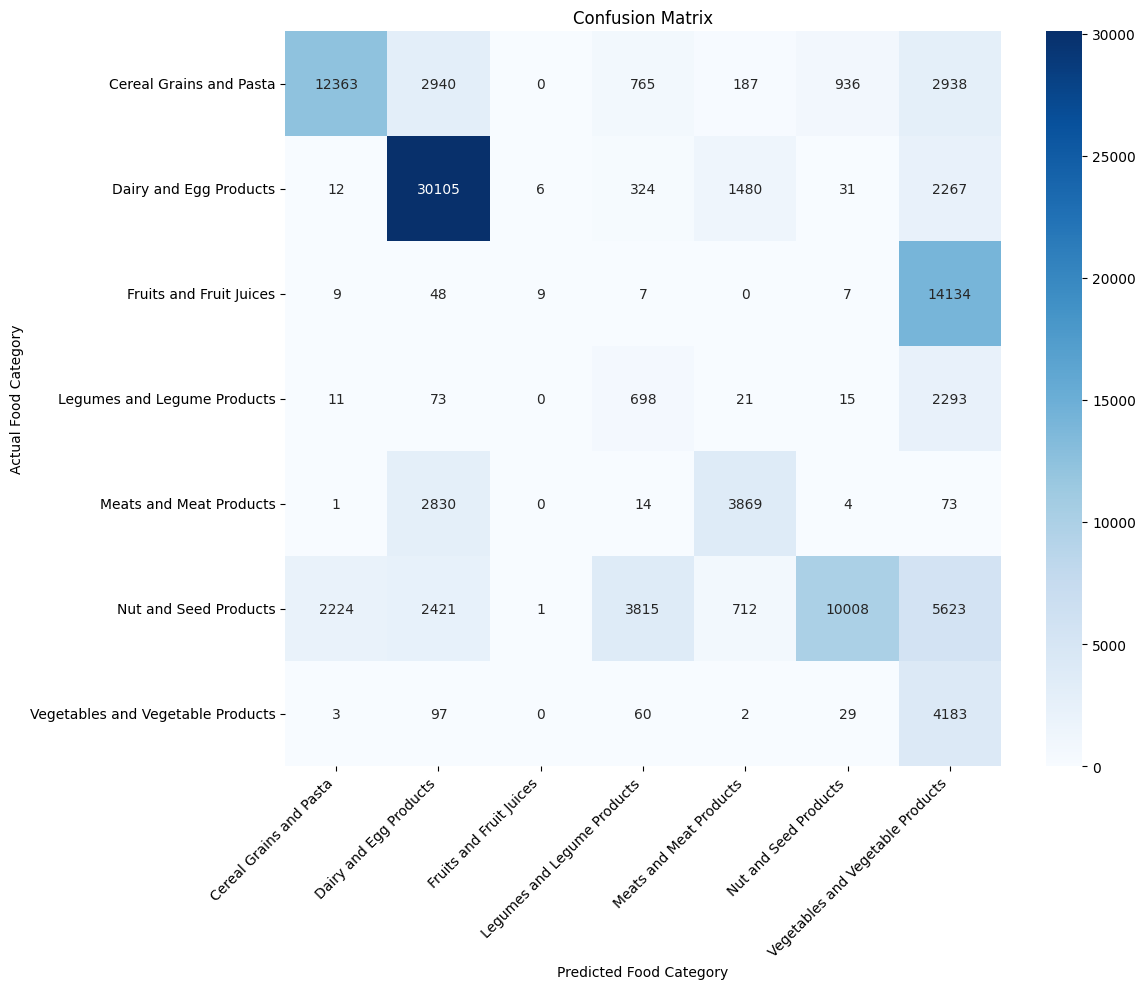

In [44]:
predicted_category = model.predict(X_bf)

accuracy = accuracy_score(y_bf, predicted_category)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
print("\nClassification Report:")

report_labels = np.union1d(y_bf, predicted_category) 
print(classification_report(y_bf, predicted_category, labels=report_labels, zero_division=0))
    
# Generates and display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_bf, predicted_category, labels=report_labels)
    
    # Plotting the confusion matrix for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=report_labels, yticklabels=report_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Food Category')
plt.xlabel('Predicted Food Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--- Training the K-Nearest Neighbors classifier ---
KNeighborsClassifier training complete.

--- Evaluating KNN Model Performance on the Test Set ---
KNN Test Set Accuracy: 0.5287

KNN Classifier - Classification Report:
                                   precision    recall  f1-score   support

          Cereal Grains and Pasta       0.69      0.77      0.73     20129
           Dairy and Egg Products       0.83      0.64      0.73     34225
          Fruits and Fruit Juices       0.49      0.06      0.11     14214
      Legumes and Legume Products       0.13      0.42      0.19      3111
          Meats and Meat Products       0.55      0.50      0.53      6791
            Nut and Seed Products       0.88      0.41      0.56     24804
Vegetables and Vegetable Products       0.13      0.85      0.22      4374

                         accuracy                           0.53    107648
                        macro avg       0.53      0.52      0.44    107648
                     weight

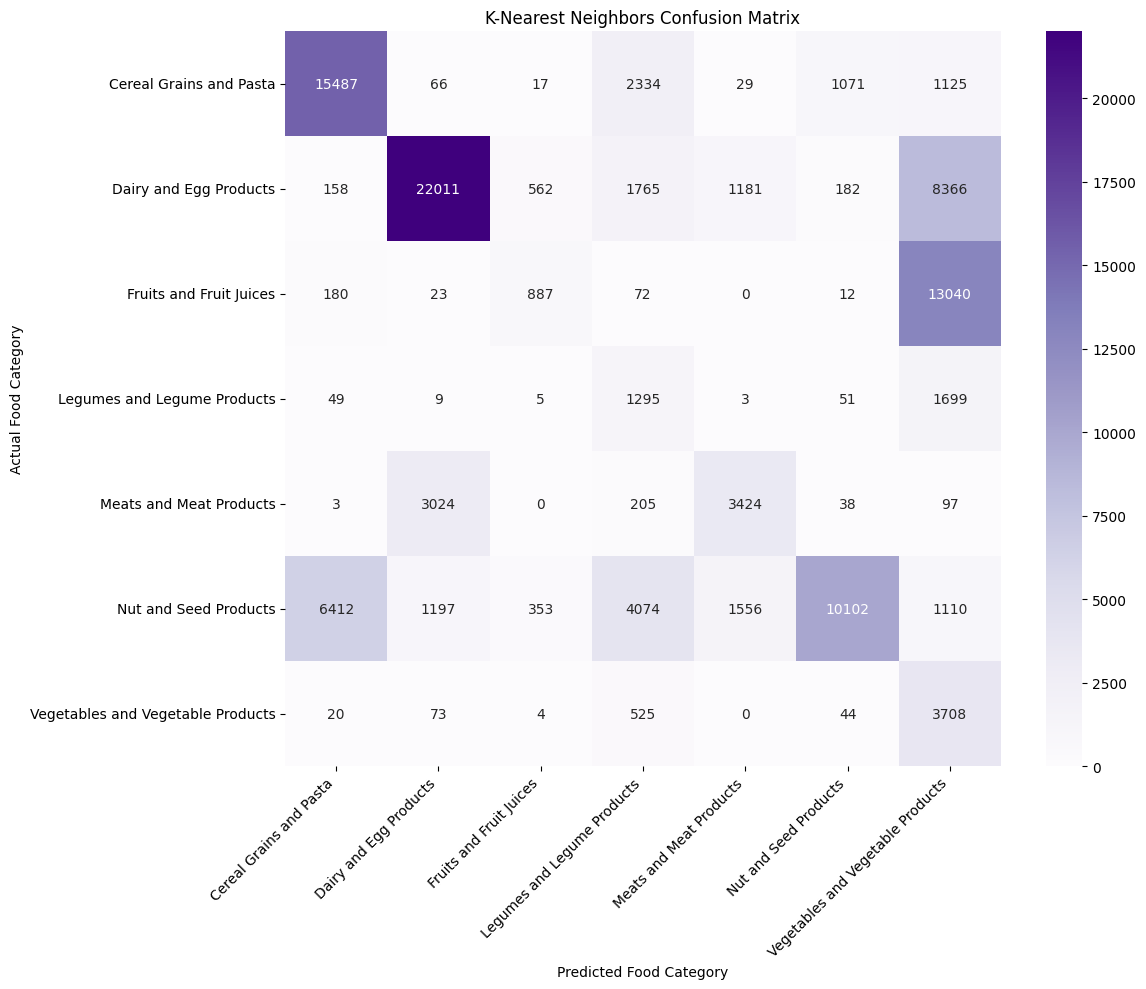

In [45]:

print("--- Training the K-Nearest Neighbors classifier ---")
    
# Training the model using n=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("KNeighborsClassifier training complete.")
    
# Make preductions and calculate accuracy
print("\n--- Evaluating KNN Model Performance on the Test Set ---")
y_knn_pred = knn_model.predict(X_bf)
knn_accuracy = accuracy_score(y_bf, y_knn_pred)
print(f"KNN Test Set Accuracy: {knn_accuracy:.4f}")
    
# Print classification report
report_labels = np.union1d(y_bf.unique(), y_knn_pred)
print("\nKNN Classifier - Classification Report:")
print(classification_report(y_bf, y_knn_pred, labels=report_labels, zero_division=0))
    
# Generate and display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_bf, y_knn_pred, labels=report_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", 
                xticklabels=report_labels, yticklabels=report_labels)
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.ylabel('Actual Food Category')
plt.xlabel('Predicted Food Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()